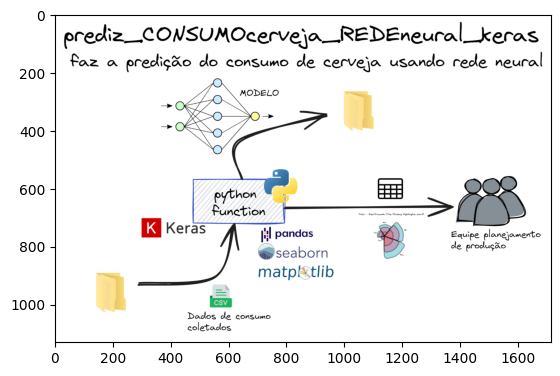

In [19]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('prediz_CONSUMOcerveja_DEEPlearning.png'))

## Faz a limpeza e tratamento dos dados de consumo de cerveja

- Arquivo de consumo de cerveja em São Paulo
https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo?resource=download

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

Cria e Treina modelo de Deep Lerning com rede neural para predizer o consumo de cerveja.

- Este projeto faz a limpeza e tratamento dos dados de consumo de cerveja, separa os dados de treino e teste, treina, testa e verifica qual modelo ficou mais adequado para fazer a predição do consumo de cerveja. Por fim faz o deploy do modelo para ser utilizado na previsão de consumo.

O objetivo é treinar um modelo de rede neural para fazer a predição do consumo de cerveja levando em consideração algumas variáveis mostradas abaixo.

DADOS:
data - Data
temp_media - Temperatura Média (°C)
temp_min - Temperatura Mínima (°C)
temp_max - Temperatura Máxima (°C)
chuva - Precipitação (mm)
fds - Final de Semana (1 = Sim; 0 = Não)
consumo - Consumo de Cerveja (litros)

In [20]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe avisos de warning

In [21]:
# le os dados do dataset recebendo em formato de dataframe
dfx = pd.read_csv('arquivos/consumo_cerveja.csv', decimal=',')

In [22]:
# verifica quantas linhas e colunas o dataframe possui
dfx.shape

(941, 7)

In [23]:
# reconhece os nomes das colunas existentes e verifica se existe algum nulo.
# existem várias linhas com nulos que serão apagadas
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.6+ KB


In [24]:
# muda o nome das colunas para facilitar o trabalho
dfx.columns = ['Data', 'temp_media', 'temp_min', 'temp_max', 'precip_mm', 'fim_semana', 'cons_litros']

In [25]:
# apaga linhas com algum campo nulo
dfx = dfx.dropna()

In [26]:
# Faz um reconhecimento das colunas e dos dados
dfx.head(5)

,Data,temp_media,temp_min,temp_max,precip_mm,fim_semana,cons_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [27]:
# altera o tipo da coluna Data para datetime
dfx['Data'] = pd.to_datetime(dfx['Data'])

In [28]:
# altera o tipo da coluna consumo para float
dfx['cons_litros'] = dfx['cons_litros'].astype(float)

In [29]:
# verifica algumas estatísticas de posição e dispersão
dfx.describe().round(2)

,Data,temp_media,temp_min,temp_max,precip_mm,fim_semana,cons_litros
count,365,365.00,365.00,365.00,365.00,365.00,365.00
mean,2015-07-02 00:00:00,21.23,17.46,26.61,5.20,0.28,25.40
min,2015-01-01 00:00:00,12.90,10.60,14.50,0.00,0.00,14.34
25%,2015-04-02 00:00:00,19.02,15.30,23.80,0.00,0.00,22.01
50%,2015-07-02 00:00:00,21.38,17.90,26.90,0.00,0.00,24.87
75%,2015-10-01 00:00:00,23.28,19.60,29.40,3.20,1.00,28.63
max,2015-12-31 00:00:00,28.86,24.50,36.50,94.80,1.00,37.94
std,NaN,3.18,2.83,4.32,12.42,0.45,4.40


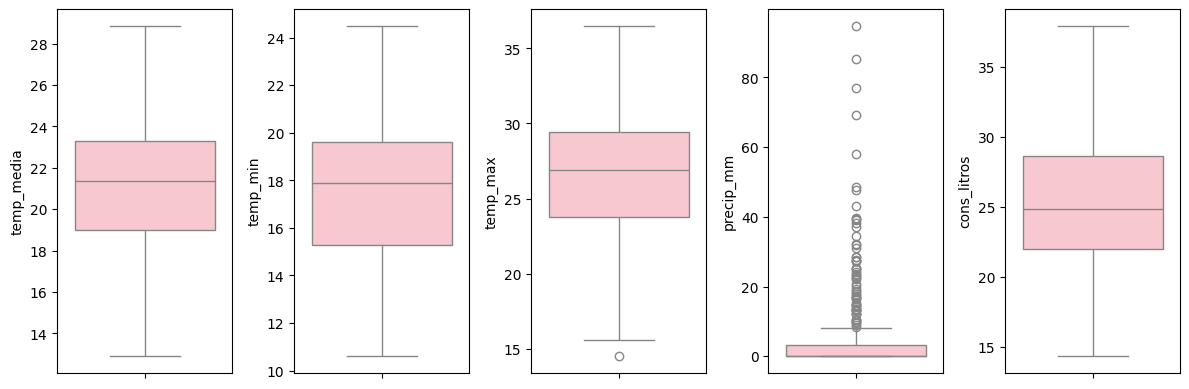

In [30]:
# visualizando boxplot para ver a distribuição nos quartis e a existência de outliers
search_outliers = ["temp_media", "temp_min", "temp_max", 'precip_mm', 'cons_litros']

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=dfx, ax=axs[i], color='pink')

plt.show()

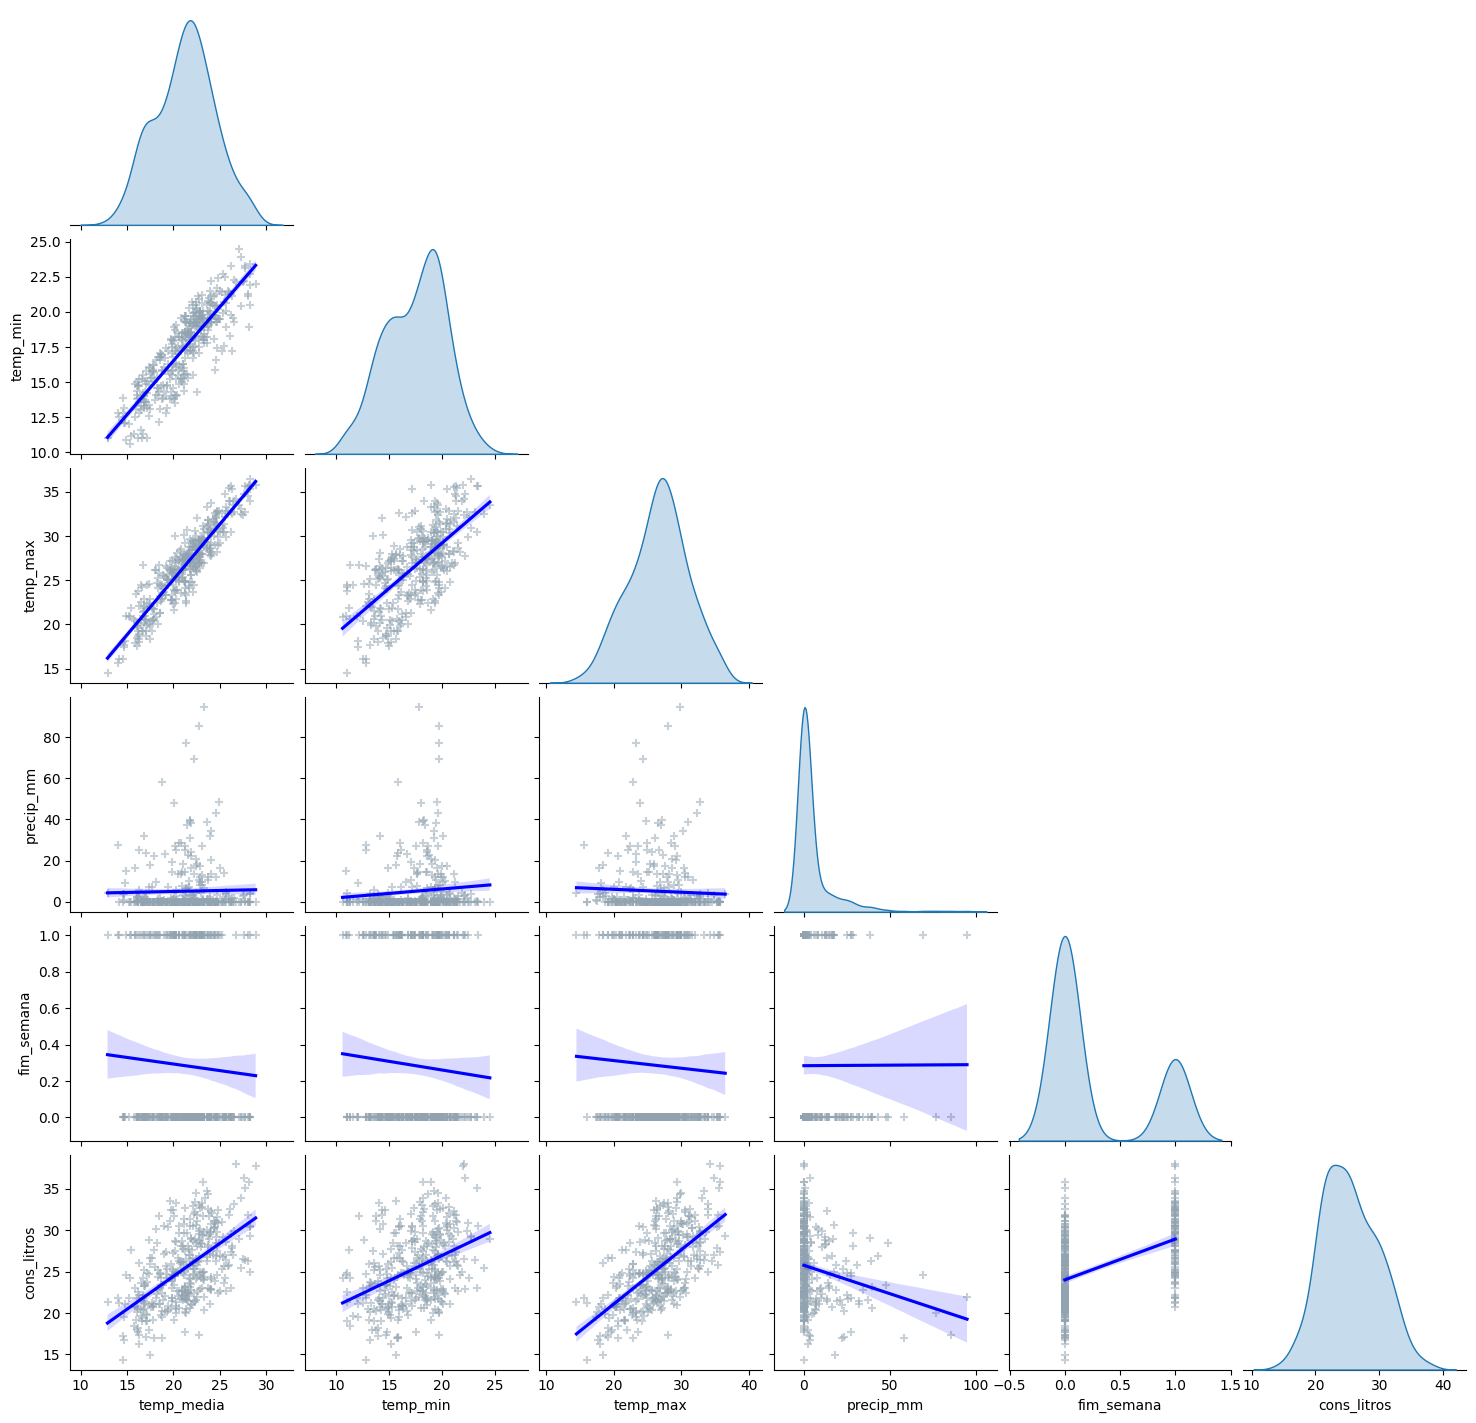

In [31]:
# verificando a distribuição dos dados
p= sns.pairplot(dfx[["temp_media", "temp_min", "temp_max", 'precip_mm', 'fim_semana', 'cons_litros']], \
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'color':'#0000ff'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#91a3b0'}},
                kind='reg'
                );
p.fig.subplots_adjust(top=0.95)

Na última linha (cons_litros) do gráfico anterior pode-se observar que temos uma relação linear significativa entre o consumo de cerveja com a temp_media (temperatura média), temp_max(temperatura máxima) e que o consumo aumenta quando se aproxima o final de semana.

<Axes: >

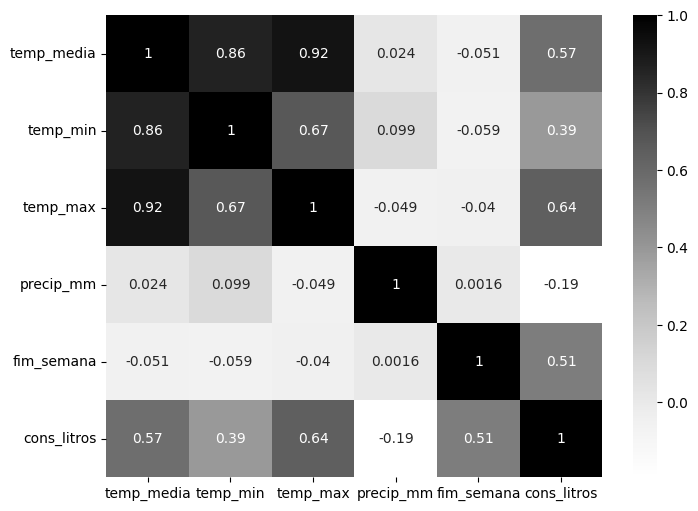

In [32]:
# correlação entre os valores
fig,ax = plt.subplots(figsize=(8,6))

sns.heatmap(dfx[["temp_media", "temp_min", "temp_max", 'precip_mm', 'fim_semana', 'cons_litros']].\
            corr().round(4), annot=True, cmap="Grays")

Na últma coluna (cons_liros) do gráfico anterior, observamos que temos uma correlação maior que 0,50 do consumo de cerveja com a temp_media (temperatura média), temp_max(temperatura máxima) e com a informação de fim de semana. Vamos adotar essas 3 informações que se alinham ao consumo de cerveja.

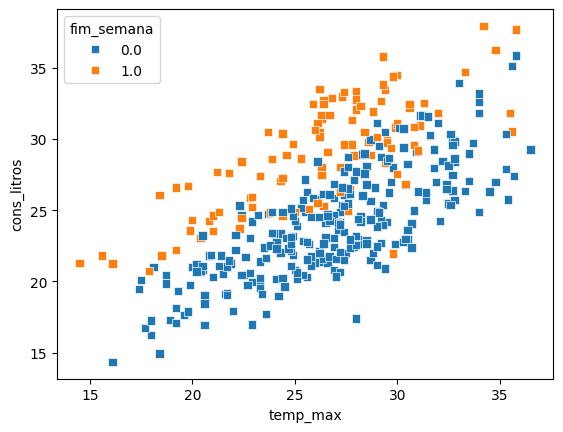

In [33]:
# analisando a temperatura máxima com o consumo de cerveja em dia de semana e final de semana
# pelo gráfico percebe-se que o consumo tem uma relação linear com a temperatura máxima
# no final de semana (laranja) o consumo é maior a medida que a temperatura máxima sobe
sns.scatterplot(x=dfx['temp_max'], y=dfx['cons_litros'], data=dfx, hue=dfx['fim_semana'], marker='s')
plt.show()

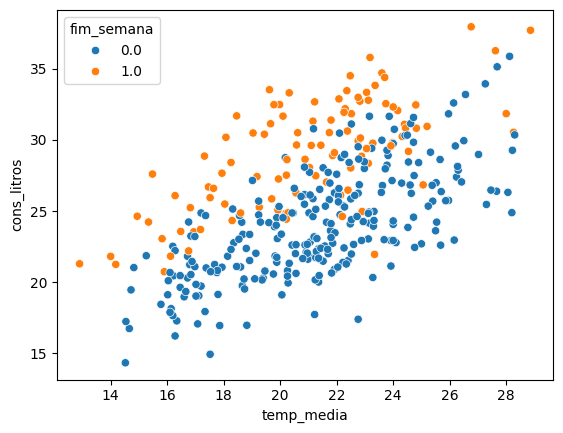

In [34]:
# analisando a temperatura média com o consumo de cerveja em dia de semana e final de semana
# pelo gráfico percebe-se que o consumo tem uma relação linear com a temperatura média
# no final de semana (laranja) o consumo é maior a medida que a temperatura média sobe
sns.scatterplot(x=dfx['temp_media'], y=dfx['cons_litros'], data=dfx, hue=dfx['fim_semana'], marker='o')
plt.show()

In [35]:
# salva os dados tratados em arquivo csv organizado por data
dfx.sort_values(by=["Data"]).to_csv('arquivos_tratados/df_consumo_cerveja.csv', index=False)